In [608]:
import os

In [609]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
import seaborn as sns

In [610]:
os.chdir('E:\Sem4\Kaggle Project\house-prices-advanced-regression-techniques')

In [611]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [612]:
train_data.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
5         Lvl    AllPub    ...            0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
7         Lvl    AllPub    ...            0    NaN    NaN        Shed     350   
8         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
9         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [613]:
test_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub      ...               120        0    NaN  MnPrv   
1         Lvl    AllPub      ...                 0        0    NaN    NaN   
2         Lvl    AllPub      ...                 0        0    NaN  MnPrv   
3         Lvl    AllPub      ...                 0        0    NaN    NaN   
4         HLS    AllPub      ...               144        0    NaN    NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0      6    2010        WD         Normal  
1        Gar2   12500      6    2010        WD         Normal  
2         NaN       0      3    2010        WD         Normal  
3         NaN       0      6    2010        WD         Normal  
4         NaN       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [614]:
train_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

In [615]:
test_data.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704   
std       1.113740    30.390071     21.130467   177.625900   455.268042   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000   

          ...        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count     ...       1458.000000  1459.000000  1459.000000    1459.000000   
mean      ...        472.768861    93.174777    48.313914      24.243317   
std       ...        217.048611   127.744882    68.883364      67.227765   
min       ...          0.000000     0.000000     0.000000       0.000000   
25%       ...        318.000000     0.000000     0.000000       0.000000   
50%       ...        480.000000     0.000000    28.000000       0.000000   
75%       ...        576.000000   168.000000    72.000000       0.000000   
max       ...       1488.000000  1424.000000   742.000000    1012.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold  \
count  1459.000000  1459.000000  1459.000000   1459.000000  1459.000000   
mean      1.794380    17.064428     1.744345     58.167923     6.104181   
std      20.207842    56.609763    30.491646    630.806978     2.722432   
min       0.000000     0.000000     0.000000      0.000000     1.000000   
25%       0.000000     0.000000     0.000000      0.000000     4.000000   
50%       0.000000     0.000000     0.000000      0.000000     6.000000   
75%       0.000000     0.000000     0.000000      0.000000     8.000000   
max     360.000000   576.000000   800.000000  17000.000000    12.000000   

            YrSold  
count  1459.000000  
mean   2007.769705  
std       1.301740  
min    2006.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2010.000000  

[8 rows x 37 columns]

In [616]:
train_data.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [617]:
missing_variables = pd.concat([train_data.isnull().sum(),test_data.isnull().sum()],axis = 1,keys = ['train','test'])
missing_variables[missing_variables.train>1]

train    test
Alley          1369  1352.0
BsmtCond         37    45.0
BsmtExposure     38    44.0
BsmtFinType1     37    42.0
BsmtFinType2     38    42.0
BsmtQual         37    44.0
Fence          1179  1169.0
FireplaceQu     690   730.0
GarageCond       81    78.0
GarageFinish     81    78.0
GarageQual       81    78.0
GarageType       81    76.0
GarageYrBlt      81    78.0
LotFrontage     259   227.0
MasVnrArea        8    15.0
MasVnrType        8    16.0
MiscFeature    1406  1408.0
PoolQC         1453  1456.0

In [618]:
list=missing_variables[missing_variables.train>1].index.tolist()
len(list)

18

In [619]:
pd.options.display.max_rows = 4000

In [620]:
miss_cat_var=['BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtCond', 'BsmtQual','MasVnrType', 'GarageCond','GarageFinish','GarageQual','GarageType','MiscFeature','FireplaceQu','Fence','PoolQC','Alley']
miss_num_var=['MasVnrArea','LotFrontage','GarageYrBlt']

In [621]:
miss_cat=train_data[miss_cat_var]
miss_num=train_data[miss_num_var]

In [622]:
miss_cat.fillna("None", inplace = True)
train_data[miss_cat_var]=miss_cat 

C:\Users\manid\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [623]:
train_data[miss_cat_var]

BsmtExposure BsmtFinType1 BsmtFinType2 BsmtCond BsmtQual MasVnrType  \
0              No          GLQ          Unf       TA       Gd    BrkFace   
1              Gd          ALQ          Unf       TA       Gd       None   
2              Mn          GLQ          Unf       TA       Gd    BrkFace   
3              No          ALQ          Unf       Gd       TA       None   
4              Av          GLQ          Unf       TA       Gd    BrkFace   
5              No          GLQ          Unf       TA       Gd       None   
6              Av          GLQ          Unf       TA       Ex      Stone   
7              Mn          ALQ          BLQ       TA       Gd      Stone   
8              No          Unf          Unf       TA       TA       None   
9              No          GLQ          Unf       TA       TA       None   
10             No          Rec          Unf       TA       TA       None   
11             No          GLQ          Unf       TA       Ex      Stone   
12             No          ALQ          Unf       TA       TA       None   
13             Av          Unf          Unf       TA       Gd      Stone   
14             No          BLQ          Unf       TA       TA    BrkFace   
15             No          Unf          Unf       TA       TA       None   
16             No          ALQ          Unf       TA       TA    BrkFace   
17           None         None         None     None     None       None   
18             No          GLQ          Unf       TA       TA       None   
19             No          LwQ          Unf       TA       TA       None   
20             Av          Unf          Unf       TA       Ex    BrkFace   
21             No          Unf          Unf       TA       TA       None   
22             No          Unf          Unf       TA       Gd    BrkFace   
23             No          GLQ          Unf       TA       Gd       None   
24             Mn          Rec          ALQ       TA       TA       None   
25             No          Unf          Unf       TA       Gd      Stone   
26             Mn          BLQ          Rec       TA       TA       None   
27             No          GLQ          Unf       TA       Ex      Stone   
28             Gd          BLQ          Unf       TA       TA       None   
29             No          Unf          Unf       TA       TA       None   
30             No          Unf          Unf       TA       TA       None   
31             No          Unf          Unf       TA       TA       None   
32             Av          Unf          Unf       TA       Ex       None   
33             No          Rec          Unf       TA       TA       None   
34             No          GLQ          Unf       TA       Ex    BrkFace   
35             Av          Unf          Unf       TA       Ex      Stone   
36             No          Unf          Unf       TA       Gd       None   
37             No          Rec          Unf       TA       TA    BrkFace   
38             No          GLQ          Unf       TA       TA       None   
39           None         None         None     None     None       None   
40             No          Rec          Unf       TA       TA    BrkFace   
41             Gd          BLQ          Unf       TA       TA       None   
42             Av          ALQ          LwQ       TA       Gd       None   
43             Av          LwQ          BLQ       TA       Gd       None   
44             No          ALQ          BLQ       TA       TA       None   
45             No          GLQ          Unf       TA       Ex    BrkFace   
46             No          GLQ          Unf       TA       Ex       None   
47             Av          GLQ          Unf       TA       Gd       None   
48             No          Unf          Unf       TA       TA       None   
49             No          BLQ          Unf       TA       TA       None   
50             Av          GLQ          Unf       TA       Gd       None   
51             No          Unf          Unf       TA 

In [624]:
df=train_data[miss_num_var].isnull().astype(int).add_suffix('_nan')
train_data=train_data.join(df)

In [625]:
# transformed_values = imputer.fit_transform(values)
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
miss_num=imp.fit_transform(miss_num)

In [626]:
train_data[miss_num_var]=pd.DataFrame(miss_num)


In [627]:
train_data[['MasVnrArea','LotFrontage','GarageYrBlt']]

MasVnrArea  LotFrontage  GarageYrBlt
0          196.0         65.0       2003.0
1            0.0         80.0       1976.0
2          162.0         68.0       2001.0
3            0.0         60.0       1998.0
4          350.0         84.0       2000.0
5            0.0         85.0       1993.0
6          186.0         75.0       2004.0
7          240.0         69.0       1973.0
8            0.0         51.0       1931.0
9            0.0         50.0       1939.0
10           0.0         70.0       1965.0
11         286.0         85.0       2005.0
12           0.0         69.0       1962.0
13         306.0         91.0       2006.0
14         212.0         69.0       1960.0
15           0.0         51.0       1991.0
16         180.0         69.0       1970.0
17           0.0         72.0       1967.0
18           0.0         66.0       2004.0
19           0.0         70.0       1958.0
20         380.0        101.0       2005.0
21           0.0         57.0       1930.0
22         281.0         75.0       2002.0
23           0.0         44.0       1976.0
24           0.0         69.0       1968.0
25         640.0        110.0       2007.0
26           0.0         60.0       2005.0
27         200.0         98.0       2008.0
28           0.0         47.0       1957.0
29           0.0         60.0       1920.0
30           0.0         50.0       1920.0
31           0.0         69.0       1966.0
32           0.0         85.0       2007.0
33           0.0         70.0       1959.0
34         246.0         60.0       2005.0
35         132.0        108.0       2004.0
36           0.0        112.0       1995.0
37         650.0         74.0       1954.0
38           0.0         68.0       1953.0
39           0.0         65.0       1980.0
40         101.0         84.0       1965.0
41           0.0        115.0       1959.0
42           0.0         69.0       1983.0
43           0.0         69.0       1977.0
44           0.0         70.0       1959.0
45         412.0         61.0       2005.0
46           0.0         48.0       2003.0
47           0.0         84.0       2006.0
48           0.0         33.0       1980.0
49           0.0         66.0       1966.0
50           0.0         69.0       1997.0
51           0.0         52.0       1985.0
52           0.0        110.0       1963.0
53           0.0         68.0       1981.0
54           0.0         60.0       1962.0
55         272.0        100.0       1964.0
56         456.0         24.0       1999.0
57           0.0         89.0       2004.0
58        1031.0         66.0       2006.0
59           0.0         60.0       1973.0
60           0.0         63.0       2006.0
61           0.0         60.0       1935.0
62         178.0         44.0       2006.0
63           0.0         50.0       1990.0
64         573.0         69.0       1998.0
65         344.0         76.0       2004.0
66         287.0         69.0       1970.0
67         167.0         72.0       2003.0
68           0.0         47.0       1945.0
69           0.0         81.0       1953.0
70        1115.0         95.0       1973.0
71           0.0         69.0       1987.0
72          40.0         74.0       1998.0
73         104.0         85.0       1989.0
74           0.0         60.0       1915.0
75           0.0         21.0       1973.0
76           0.0         69.0       1956.0
77           0.0         50.0       1948.0
78           0.0         72.0       1980.0
79           0.0         60.0       1966.0
80         576.0        100.0       1968.0
81         443.0         32.0       1998.0
82         468.0         78.0       2007.0
83          66.0         80.0       1974.0
84          22.0         69.0       1995.0
85         284.0        121.0       1991.0
86           0.0        122.0       2005.0
87          76.0         40.0       2009.0
88           0.0        105.0       1980.0
89           0.0         60.0       1980.0
90           0.0         60.0       1950.0
91         203.0         85.0       1961.0
92     

In [628]:
train_data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [629]:
train_data['Garage_Age']=2019-train_data['GarageYrBlt']
train_data['Built_Age']=2019-train_data['YearBuilt']
train_data['RemodAdd_Age']=2019-train_data['YearRemodAdd']
train_data['Soldyr_age']=2019-train_data['YrSold']

In [630]:
train_data=train_data.drop(columns=['GarageYrBlt','YearBuilt','YearRemodAdd','YrSold'])


In [631]:
train_data= pd.get_dummies(data=train_data)

In [632]:
train_data=train_data.dropna()

In [633]:
train_data

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
5        6          50         85.0    14115            5            5   
6        7          20         75.0    10084            8            5   
7        8          60         69.0    10382            7            6   
8        9          50         51.0     6120            7            5   
9       10         190         50.0     7420            5            6   
10      11          20         70.0    11200            5            5   
11      12          60         85.0    11924            9            5   
12      13          20         69.0    12968            5            6   
13      14          20         91.0    10652            7            5   
14      15          20         69.0    10920            6            5   
15      16          45         51.0     6120            7            8   
16      17          20         69.0    11241            6            7   
17      18          90         72.0    10791            4            5   
18      19          20         66.0    13695            5            5   
19      20          20         70.0     7560            5            6   
20      21          60        101.0    14215            8            5   
21      22          45         57.0     7449            7            7   
22      23          20         75.0     9742            8            5   
23      24         120         44.0     4224            5            7   
24      25          20         69.0     8246            5            8   
25      26          20        110.0    14230            8            5   
26      27          20         60.0     7200            5            7   
27      28          20         98.0    11478            8            5   
28      29          20         47.0    16321            5            6   
29      30          30         60.0     6324            4            6   
30      31          70         50.0     8500            4            4   
31      32          20         69.0     8544            5            6   
32      33          20         85.0    11049            8            5   
33      34          20         70.0    10552            5            5   
34      35         120         60.0     7313            9            5   
35      36          60        108.0    13418            8            5   
36      37          20        112.0    10859            5            5   
37      38          20         74.0     8532            5            6   
38      39          20         68.0     7922            5            7   
39      40          90         65.0     6040            4            5   
40      41          20         84.0     8658            6            5   
41      42          20        115.0    16905            5            6   
42      43          85         69.0     9180            5            7   
43      44          20         69.0     9200            5            6   
44      45          20         70.0     7945            5            6   
45      46         120         61.0     7658            9            5   
46      47          50         48.0    12822            7            5   
47      48          20         84.0    11096            8            5   
48      49         190         33.0     4456            4            5   
49      50          20         66.0     7742            5            7   
50      51          60         69.0    13869            6            6   
51      52          50         52.0     6240            6            6   
52      53          90        110.0     8472            5            5   
53      54  

In [634]:
corr1 = train_data.corr()['SalePrice']  
corr =corr1[np.abs(corr1) > 0.5]  
corr = pd.DataFrame(data=corr,columns= ['SalePrice'])
corr = corr.drop_duplicates().sort_values('SalePrice',ascending =False)
corr
corr_var_gt50per=corr.index.tolist()

In [635]:
corr1 = train_data.corr()['SalePrice']  
corr =corr1[np.abs(corr1) > 0.3]  
corr = pd.DataFrame(data=corr,columns= ['SalePrice'])
corr = corr.drop_duplicates().sort_values('SalePrice',ascending =False)
corr=corr.index.tolist()
corr

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'BsmtQual_Ex',
 'TotRmsAbvGrd',
 'KitchenQual_Ex',
 'Foundation_PConc',
 'MasVnrArea',
 'Fireplaces',
 'ExterQual_Gd',
 'ExterQual_Ex',
 'BsmtFinType1_GLQ',
 'HeatingQC_Ex',
 'GarageFinish_Fin',
 'Neighborhood_NridgHt',
 'BsmtFinSF1',
 'SaleType_New',
 'SaleCondition_Partial',
 'FireplaceQu_Gd',
 'GarageType_Attchd',
 'LotFrontage',
 'MasVnrType_Stone',
 'Neighborhood_NoRidge',
 'WoodDeckSF',
 'KitchenQual_Gd',
 '2ndFlrSF',
 'OpenPorchSF',
 'BsmtExposure_Gd',
 'Exterior2nd_VinylSd',
 'Exterior1st_VinylSd',
 'HeatingQC_TA',
 'Foundation_CBlock',
 'GarageType_Detchd',
 'MasVnrType_None',
 'GarageFinish_Unf',
 'BsmtQual_TA',
 'Garage_Age',
 'FireplaceQu_None',
 'RemodAdd_Age',
 'KitchenQual_TA',
 'Built_Age',
 'ExterQual_TA']

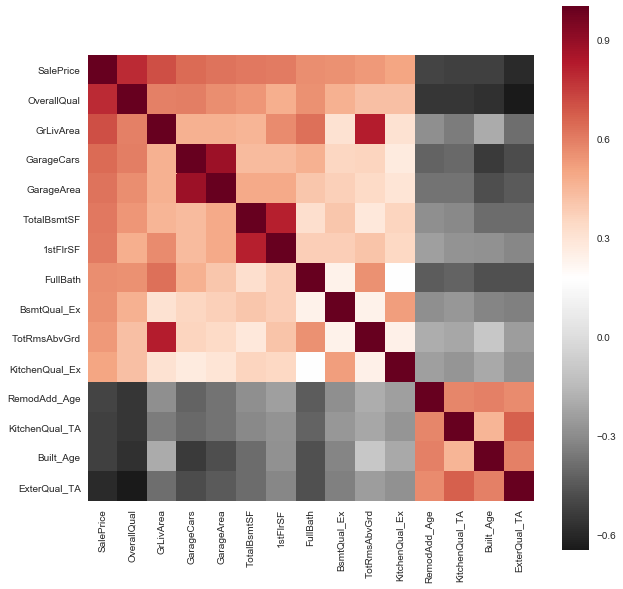

In [636]:

train_data = train_data[corr]
train_data
corr_matrix = train_data[corr_var_gt50per].corr()
f,ax = plt.subplots(figsize =(10,10))
sns.heatmap(corr_matrix, vmax=1,square=True,cmap='RdGy_r')

In [637]:
labels_to_drop = ['GarageArea','TotRmsAbvGrd','1stFlrSF','KitchenQual_TA','Built_Age','ExterQual_TA','Built_Age']
train_data = train_data.drop(labels_to_drop, axis =1)
train_data.head(10)

SalePrice  OverallQual  GrLivArea  GarageCars  TotalBsmtSF  FullBath  \
0     208500            7       1710           2          856         2   
1     181500            6       1262           2         1262         2   
2     223500            7       1786           2          920         2   
3     140000            7       1717           3          756         1   
4     250000            8       2198           3         1145         2   
5     143000            5       1362           2          796         1   
6     307000            8       1694           2         1686         2   
7     200000            7       2090           2         1107         2   
8     129900            7       1774           2          952         2   
9     118000            5       1077           1          991         1   

   BsmtQual_Ex  KitchenQual_Ex  Foundation_PConc  MasVnrArea      ...       \
0            0               0                 1       196.0      ...        
1            0               0                 0         0.0      ...        
2            0               0                 1       162.0      ...        
3            0               0                 0         0.0      ...        
4            0               0                 1       350.0      ...        
5            0               0                 0         0.0      ...        
6            1               0                 1       186.0      ...        
7            0               0                 0       240.0      ...        
8            0               0                 0         0.0      ...        
9            0               0                 0         0.0      ...        

   Exterior1st_VinylSd  HeatingQC_TA  Foundation_CBlock  GarageType_Detchd  \
0                    1             0                  0                  0   
1                    0             0                  1                  0   
2                    1             0                  0                  0   
3                    0             0                  0                  1   
4                    1             0                  0                  0   
5                    1             0                  0                  0   
6                    1             0                  0                  0   
7                    0             0                  1                  0   
8                    0             0                  0                  1   
9                    0             0                  0                  0   

   MasVnrType_None  GarageFinish_Unf  BsmtQual_TA  Garage_Age  \
0                0                 0            0        16.0   
1                1                 0            0        43.0   
2                0                 0            0        18.0   
3                1                 1            1        21.0   
4                0                 0            0        19.0   
5                1                 1            0        26.0   
6                0                 0            0        15.0   
7                0                 0            0        46.0   
8                1                 1            1        88.0   
9                1                 0            1        80.0   

   FireplaceQu_None  RemodAdd_Age  
0                 1            16  
1                 0            43  
2                 0            17  
3                 0            49  
4                 0            19  
5                 1            24  
6                 0            14  
7                 0            46  
8                 0            69  
9                 0            69  

[10 rows x 41 columns]

Text(0.5,1,'Sale Price vs KitchenQual_Ex')

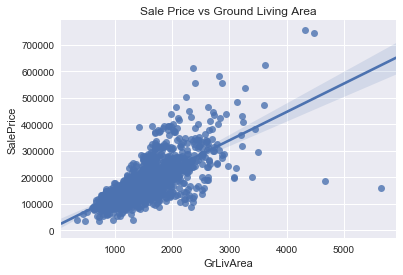

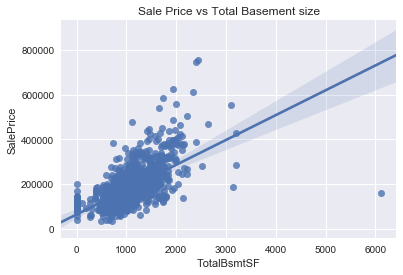

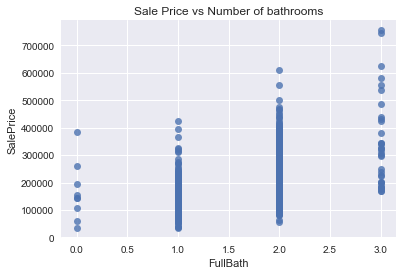

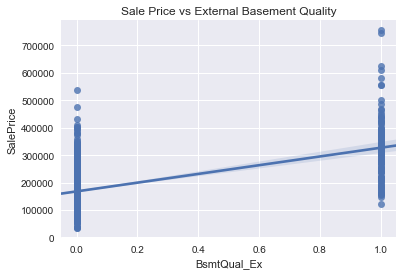

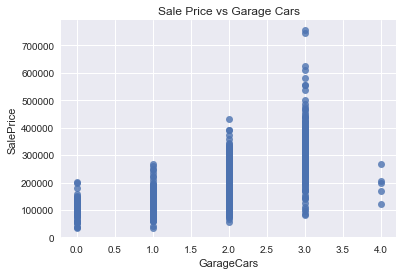

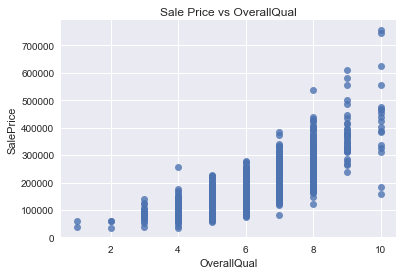

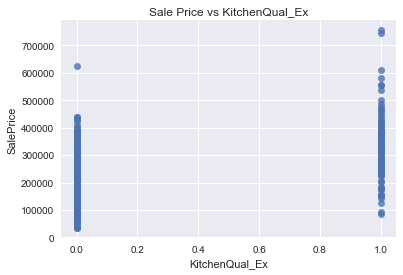

In [559]:
plt.figure(1)
sns.set(color_codes=True)
ax = sns.regplot(x="GrLivArea", y="SalePrice", data=train_data)
plt.title('Sale Price vs Ground Living Area')

plt.figure(2)
sns.set(color_codes=True)
ax = sns.regplot(x="TotalBsmtSF", y="SalePrice", data=train_data)
plt.title('Sale Price vs Total Basement size')

plt.figure(3)
sns.set(color_codes=True)
ax = sns.regplot(x="FullBath", y="SalePrice", data=train_data, fit_reg = False)
plt.title('Sale Price vs Number of bathrooms')

plt.figure(4)
sns.set(color_codes=True)
ax = sns.regplot(x="BsmtQual_Ex", y="SalePrice", data=train_data)
plt.title('Sale Price vs External Basement Quality')


plt.figure(5)
sns.set(color_codes=True)
ax = sns.regplot(x="GarageCars", y="SalePrice", data=train_data, fit_reg = False)
plt.title('Sale Price vs Garage Cars')

plt.figure(6)
sns.set(color_codes=True)
ax = sns.regplot(x="OverallQual", y="SalePrice", data=train_data, fit_reg = False)
plt.title('Sale Price vs OverallQual')

plt.figure(7)
sns.set(color_codes=True)
ax = sns.regplot(x="KitchenQual_Ex", y="SalePrice", data=train_data, fit_reg = False)
plt.title('Sale Price vs KitchenQual_Ex')



In [638]:
train_data.sort_values(by = 'SalePrice', ascending = False)[:10]['SalePrice']

691     755000
1182    745000
1169    625000
898     611657
803     582933
1046    556581
440     555000
769     538000
178     501837
798     485000
Name: SalePrice, dtype: int64

In [639]:
train_data.sort_values(by = 'GrLivArea', ascending = False)[:10]['GrLivArea']


1298    5642
523     4676
1182    4476
691     4316
1169    3627
185     3608
304     3493
1268    3447
635     3395
769     3279
Name: GrLivArea, dtype: int64

In [640]:

train_data =train_data.drop(train_data[train_data.GrLivArea == 5642].index)
train_data =train_data.drop(train_data[train_data.GrLivArea == 4476].index)
train_data =train_data.drop(train_data[train_data.GrLivArea == 4676].index)
train_data =train_data.drop(train_data[train_data.SalePrice == 755000].index)
train_data =train_data.drop(train_data[train_data.SalePrice == 745000].index)

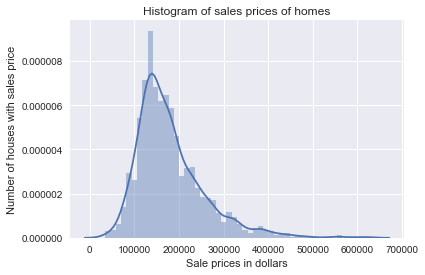

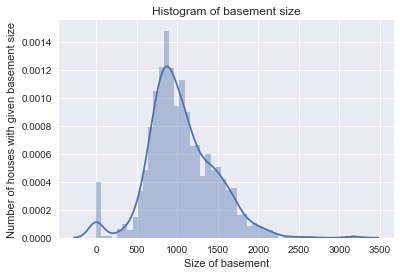

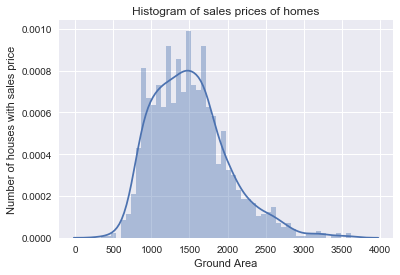

In [641]:
plt.figure(1)
sns.distplot(train_data['SalePrice'], 50)
plt.xlabel("Sale prices in dollars")
plt.ylabel("Number of houses with sales price") 
plt.title("Histogram of sales prices of homes")
plt.grid(True) 
plt.show()


plt.figure(2)
sns.distplot(train_data['TotalBsmtSF'], 50)
plt.xlabel("Size of basement")
plt.ylabel("Number of houses with given basement size") 
plt.title("Histogram of basement size")
plt.grid(True) 
plt.show()

plt.figure(3)
sns.distplot(train_data['GrLivArea'], 50)
plt.xlabel("Ground Area")
plt.ylabel("Number of houses with sales price") 
plt.title("Histogram of sales prices of homes")
plt.grid(True) 
plt.show()



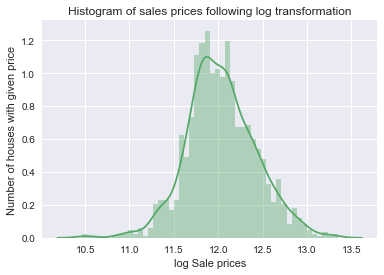

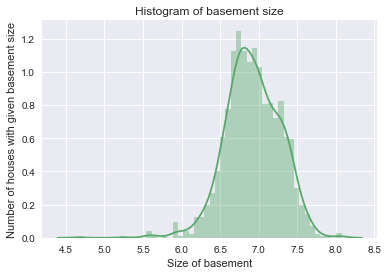

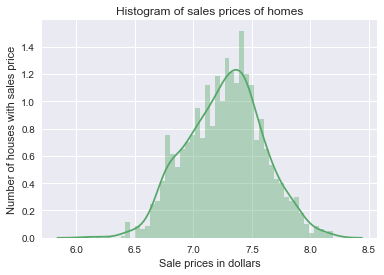

In [642]:

train_data_new = train_data.drop(train[train['TotalBsmtSF']==0].index, axis =0)

train_data_new.loc[:,['SalePrice','TotalBsmtSF','GrLivArea']] = np.log(train_data_new[['SalePrice','TotalBsmtSF','GrLivArea',]])
plt.figure(1)
sns.distplot(train_data_new['SalePrice'], 50, color = "g")
plt.xlabel("log Sale prices")
plt.ylabel("Number of houses with given price") 
plt.title("Histogram of sales prices following log transformation")
plt.grid(True) 
plt.show()

plt.figure(2)
sns.distplot(train_data_new['TotalBsmtSF'], 50, color ="g")
plt.xlabel("Size of basement")
plt.ylabel("Number of houses with given basement size") 
plt.title("Histogram of basement size")
plt.grid(True) 
plt.show()

plt.figure(3)
sns.distplot(train_data_new['GrLivArea'], 50, color ="g")
plt.xlabel("Sale prices in dollars")
plt.ylabel("Number of houses with sales price") 
plt.title("Histogram of sales prices of homes")
plt.grid(True) 
plt.show()

Text(0.5,1,'Log Sale Price vs Log Total Basement size')

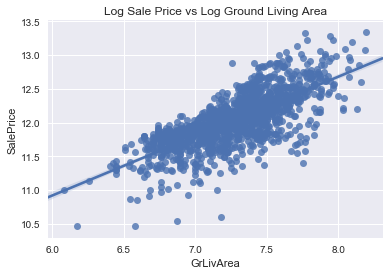

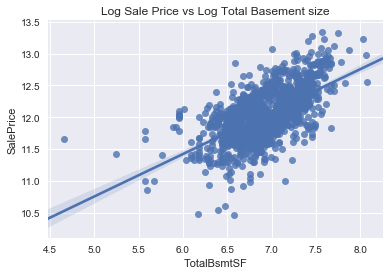

In [643]:
plt.figure()
sns.set(color_codes=True)
ax = sns.regplot(x="GrLivArea", y="SalePrice", data=train_data_new)
plt.title('Log Sale Price vs Log Ground Living Area')

plt.figure()
sns.set(color_codes=True)
ax = sns.regplot(x="TotalBsmtSF", y="SalePrice", data=train_data_new)
plt.title('Log Sale Price vs Log Total Basement size')

In [644]:
cols=train_data.columns.tolist()
del cols[0]
cols.append('Id')

In [645]:
missing_variables = pd.concat([train_data.isnull().sum(),test_data.isnull().sum()],axis = 1,keys = ['train','test'])
missing_variables[missing_variables.test>0]

train    test
Alley           NaN  1352.0
BsmtCond        NaN    45.0
BsmtExposure    NaN    44.0
BsmtFinSF1      0.0     1.0
BsmtFinSF2      NaN     1.0
BsmtFinType1    NaN    42.0
BsmtFinType2    NaN    42.0
BsmtFullBath    NaN     2.0
BsmtHalfBath    NaN     2.0
BsmtQual        NaN    44.0
BsmtUnfSF       NaN     1.0
Exterior1st     NaN     1.0
Exterior2nd     NaN     1.0
Fence           NaN  1169.0
FireplaceQu     NaN   730.0
Functional      NaN     2.0
GarageArea      NaN     1.0
GarageCars      0.0     1.0
GarageCond      NaN    78.0
GarageFinish    NaN    78.0
GarageQual      NaN    78.0
GarageType      NaN    76.0
GarageYrBlt     NaN    78.0
KitchenQual     NaN     1.0
LotFrontage     0.0   227.0
MSZoning        NaN     4.0
MasVnrArea      0.0    15.0
MasVnrType      NaN    16.0
MiscFeature     NaN  1408.0
PoolQC          NaN  1456.0
SaleType        NaN     1.0
TotalBsmtSF     0.0     1.0
Utilities       NaN     2.0

In [646]:
list=missing_variables[missing_variables.test>4].index.tolist()
len(list)

18

In [647]:
pd.options.display.max_rows = 4000

In [648]:
miss_cat_var=['BsmtQual','BsmtFinType1','GarageFinish','FireplaceQu','GarageType','MasVnrType','BsmtExposure']
miss_num_var=['MasVnrArea','LotFrontage','GarageYrBlt']

In [649]:
miss_cat=test_data[miss_cat_var]
miss_num=test_data[miss_num_var]

In [650]:
miss_cat.fillna("None", inplace = True)
test_data[miss_cat_var]=miss_cat 

C:\Users\manid\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [651]:
test_data[miss_cat_var]

BsmtQual BsmtFinType1 GarageFinish FireplaceQu GarageType MasVnrType  \
0          TA          Rec          Unf        None     Attchd       None   
1          TA          ALQ          Unf        None     Attchd    BrkFace   
2          Gd          GLQ          Fin          TA     Attchd       None   
3          TA          GLQ          Fin          Gd     Attchd    BrkFace   
4          Gd          ALQ          RFn        None     Attchd       None   
5          Gd          Unf          Fin          TA     Attchd       None   
6          Gd          ALQ          Fin        None     Attchd       None   
7          Gd          Unf          Fin          Gd     Attchd       None   
8          Gd          GLQ          Unf          Po     Attchd       None   
9          TA          ALQ          Fin        None     Attchd       None   
10         Gd          GLQ          Fin          Fa     Attchd       None   
11         TA          Rec          Unf        None     Detchd    BrkFace   
12         TA          Rec          Unf        None     Detchd    BrkFace   
13         TA          ALQ          Unf          TA     Attchd       None   
14         Gd          Unf          Unf        None     Attchd       None   
15         Ex          Unf          Fin          Gd     Attchd      Stone   
16         Gd          Unf          RFn        None     Attchd      Stone   
17         Ex          GLQ          Fin          Gd     Attchd    BrkFace   
18         Ex          GLQ          RFn          Gd     Attchd    BrkFace   
19         Ex          GLQ          Fin          Gd     Attchd    BrkFace   
20         Gd          GLQ          Fin          Ex     Attchd    BrkFace   
21         Gd          GLQ          RFn          Gd     Attchd      Stone   
22         Gd          Unf          Fin        None     Attchd       None   
23         Gd          GLQ          Fin        None     Attchd    BrkFace   
24         Gd          GLQ          Fin          Gd    BuiltIn       None   
25         Gd          Unf          Fin          Gd    BuiltIn       None   
26         Ex          Unf          Fin          TA     Attchd    BrkFace   
27         Gd          Unf          RFn          Gd     Attchd    BrkFace   
28         Gd          Unf          RFn        None     Attchd       None   
29         Ex          GLQ          Fin          Gd     Attchd       None   
30         Gd          Unf          RFn        None     Attchd    BrkFace   
31         TA          Unf          Unf        None     Detchd       None   
32         TA          BLQ          Fin          Fa     Attchd     BrkCmn   
33         Gd          LwQ          RFn          TA     Attchd    BrkFace   
34         Gd          GLQ          RFn          TA     Attchd    BrkFace   
35         Ex          GLQ          Fin          Gd     Attchd       None   
36         Gd          Unf          RFn        None     Attchd       None   
37         Gd          GLQ          RFn        None     Detchd    BrkFace   
38         Gd          GLQ          RFn        None     Detchd       None   
39         Gd          GLQ          RFn        None     Detchd    BrkFace   
40         Gd          GLQ          Unf        None     Detchd    BrkFace   
41         Gd          GLQ          RFn        None     Attchd       None   
42         Ex          GLQ          RFn          Gd     Attchd       None   
43         Gd          GLQ          RFn          TA     Attchd       None   
44         Gd          GLQ          RFn          Gd     Attchd       None   
45         TA          GLQ          RFn        None     Attchd    BrkFace   
46         Gd          GLQ          Unf          TA     Attchd       None   
47         Gd          ALQ          RFn          TA     Attchd       None   
48         TA          ALQ          RFn        None     Attchd       None   
49         TA          Rec          RFn        None     Attchd    BrkFace   
50         Gd          BLQ          RFn        None     Attchd       None   
5

In [652]:
df=test_data[miss_num_var].isnull().astype(int).add_suffix('_nan')
test_data=test_data.join(df)

In [653]:
# transformed_values = imputer.fit_transform(values)
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
miss_num=imp.fit_transform(miss_num)

In [654]:
test_data[miss_num_var]=pd.DataFrame(miss_num)


In [655]:
test_data[['MasVnrArea','LotFrontage','GarageYrBlt']]

MasVnrArea  LotFrontage  GarageYrBlt
0            0.0         80.0       1961.0
1          108.0         81.0       1958.0
2            0.0         74.0       1997.0
3           20.0         78.0       1998.0
4            0.0         43.0       1992.0
5            0.0         75.0       1993.0
6            0.0         67.0       1992.0
7            0.0         63.0       1998.0
8            0.0         85.0       1990.0
9            0.0         70.0       1970.0
10           0.0         26.0       1999.0
11         504.0         21.0       1971.0
12         492.0         21.0       1997.0
13           0.0         24.0       1975.0
14           0.0         24.0       1975.0
15         162.0        102.0       2009.0
16         256.0         94.0       2009.0
17         615.0         90.0       2005.0
18         240.0         79.0       2005.0
19        1095.0        110.0       2003.0
20         232.0        105.0       2002.0
21         178.0         41.0       2006.0
22           0.0        100.0       2005.0
23          14.0         43.0       2006.0
24           0.0         67.0       2004.0
25           0.0         63.0       2004.0
26         114.0         60.0       1998.0
27         226.0         73.0       2005.0
28           0.0         92.0       2009.0
29           0.0         84.0       2005.0
30         122.0         70.0       2004.0
31           0.0         70.0       1920.0
32         250.0         39.0       1974.0
33         504.0         85.0       1993.0
34         180.0         88.0       1992.0
35           0.0         25.0       2004.0
36           0.0         39.0       2004.0
37         120.0         30.0       2004.0
38           0.0         24.0       2004.0
39         216.0         24.0       2005.0
40        1159.0         67.0       2000.0
41           0.0         67.0       2003.0
42           0.0         57.0       2010.0
43           0.0         68.0       2000.0
44           0.0         80.0       2002.0
45         120.0         67.0       1967.0
46           0.0         80.0       1993.0
47           0.0         67.0       1978.0
48           0.0         80.0       1971.0
49         172.0         80.0       1966.0
50           0.0         90.0       1966.0
51         268.0         88.0       1967.0
52           0.0         67.0       1964.0
53         144.0         98.0       1979.0
54         265.0         68.0       1994.0
55         340.0        120.0       1949.0
56         216.0         75.0       1966.0
57           0.0         70.0       1958.0
58         506.0         70.0       2003.0
59         150.0         67.0       1959.0
60          91.0         87.0       1959.0
61         432.0         80.0       1956.0
62           0.0         60.0       1956.0
63           0.0         60.0       1952.0
64           0.0        119.0       1955.0
65           0.0         70.0       1958.0
66           0.0         65.0       1989.0
67           0.0         60.0       1950.0
68           0.0         81.0       1960.0
69         218.0         80.0       1963.0
70         771.0         60.0       1900.0
71           0.0         56.0       1979.0
72           0.0         69.0       1957.0
73           0.0         50.0       1938.0
74           0.0         69.0       1948.0
75           0.0         67.0       1962.0
76           0.0         68.0       1928.0
77           0.0         60.0       1930.0
78           0.0         50.0       2003.0
79           0.0        100.0       1979.0
80           0.0         60.0       1970.0
81           0.0         53.0       1950.0
82           0.0         67.0       1928.0
83           0.0         50.0       1926.0
84           0.0         50.0       1939.0
85           0.0         50.0       1973.0
86         300.0         53.0       1942.0
87           0.0         50.0       1948.0
88           0.0         52.0       1979.0
89           0.0         52.0       1930.0
90           0.0         51.0       1923.0
91           0.0         57.0       1915.0
92     

In [656]:
test_data['Garage_Age']=2019-test_data['GarageYrBlt']
test_data['RemodAdd_Age']=2019-test_data['YearRemodAdd']


In [657]:
test_data= pd.get_dummies(data=test_data)

In [658]:
len(cols)

41

In [659]:
test_id = test_data[['Id']]
test_id=test_id.Id.astype(int)

del cols[40]
test_data = test_data[cols]

In [662]:
test_data['GarageCars'] = test_data['GarageCars'].fillna((test_data['GarageCars'].median()))
test_data['TotalBsmtSF'] = test_data['TotalBsmtSF'].fillna((test_data['TotalBsmtSF'].median()))
test_data['BsmtFinSF1'] = test_data['GarageCars'].fillna((test_data['BsmtFinSF1'].median()))


In [663]:
test_data.isna().sum()

OverallQual              0
GrLivArea                0
GarageCars               0
TotalBsmtSF              0
FullBath                 0
BsmtQual_Ex              0
KitchenQual_Ex           0
Foundation_PConc         0
MasVnrArea               0
Fireplaces               0
ExterQual_Gd             0
ExterQual_Ex             0
BsmtFinType1_GLQ         0
HeatingQC_Ex             0
GarageFinish_Fin         0
Neighborhood_NridgHt     0
BsmtFinSF1               0
SaleType_New             0
SaleCondition_Partial    0
FireplaceQu_Gd           0
GarageType_Attchd        0
LotFrontage              0
MasVnrType_Stone         0
Neighborhood_NoRidge     0
WoodDeckSF               0
KitchenQual_Gd           0
2ndFlrSF                 0
OpenPorchSF              0
BsmtExposure_Gd          0
Exterior2nd_VinylSd      0
Exterior1st_VinylSd      0
HeatingQC_TA             0
Foundation_CBlock        0
GarageType_Detchd        0
MasVnrType_None          0
GarageFinish_Unf         0
BsmtQual_TA              0
G

In [664]:


test_data[['TotalBsmtSF']] = test_data[['TotalBsmtSF']].replace(0,1)

test_data.loc[:,['TotalBsmtSF','GrLivArea']] = np.log(test_data[['TotalBsmtSF','GrLivArea']])

In [665]:
train_y = train_data_new['SalePrice']  
train_x = train_data_new.drop('SalePrice', axis =1) # dropping output variable from train dataset 
train_x.head(10)

OverallQual  GrLivArea  GarageCars  TotalBsmtSF  FullBath  BsmtQual_Ex  \
0            7   7.444249           2     6.752270         2            0   
1            6   7.140453           2     7.140453         2            0   
2            7   7.487734           2     6.824374         2            0   
3            7   7.448334           3     6.628041         1            0   
4            8   7.695303           3     7.043160         2            0   
5            5   7.216709           2     6.679599         1            0   
6            8   7.434848           2     7.430114         2            1   
7            7   7.644919           2     7.009409         2            0   
8            7   7.480992           2     6.858565         2            0   
9            5   6.981935           1     6.898715         1            0   

   KitchenQual_Ex  Foundation_PConc  MasVnrArea  Fireplaces      ...       \
0               0                 1       196.0           0      ...        
1               0                 0         0.0           1      ...        
2               0                 1       162.0           1      ...        
3               0                 0         0.0           1      ...        
4               0                 1       350.0           1      ...        
5               0                 0         0.0           0      ...        
6               0                 1       186.0           1      ...        
7               0                 0       240.0           2      ...        
8               0                 0         0.0           2      ...        
9               0                 0         0.0           2      ...        

   Exterior1st_VinylSd  HeatingQC_TA  Foundation_CBlock  GarageType_Detchd  \
0                    1             0                  0                  0   
1                    0             0                  1                  0   
2                    1             0                  0                  0   
3                    0             0                  0                  1   
4                    1             0                  0                  0   
5                    1             0                  0                  0   
6                    1             0                  0                  0   
7                    0             0                  1                  0   
8                    0             0                  0                  1   
9                    0             0                  0                  0   

   MasVnrType_None  GarageFinish_Unf  BsmtQual_TA  Garage_Age  \
0                0                 0            0        16.0   
1                1                 0            0        43.0   
2                0                 0            0        18.0   
3                1                 1            1        21.0   
4                0                 0            0        19.0   
5                1                 1            0        26.0   
6                0                 0            0        15.0   
7                0                 0            0        46.0   
8                1                 1            1        88.0   
9                1                 0            1        80.0   

   FireplaceQu_None  RemodAdd_Age  
0                 1            16  
1                 0            43  
2                 0            17  
3                 0            49  
4                 0            19  
5                 1            24  
6                 0            14  
7                 0            46  
8                 0            69  
9                 0            69  

[10 rows x 40 columns]

In [666]:
from sklearn.cross_validation import cross_val_score,cross_val_predict,StratifiedKFold
#from sklearn.cross_validation import GridSearchCV
from sklearn import linear_model, svm
from sklearn.ensemble import GradientBoostingRegressor as xgb 
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from scipy import stats 



In [667]:
# Ridge Regression

clf_Ridge = linear_model.Ridge(fit_intercept=True, normalize=True, alpha = 0.01) 
clf_Ridge.fit(train_x, train_y)  
clf_Ridge_score = cross_val_score(clf_Ridge,train_x, train_y, cv = 10, scoring = 'r2')

# Support Vecotr Regression
X_scaler = preprocessing.StandardScaler()
train_x = X_scaler.fit_transform(train_x)
clf_SVR = svm.SVR(kernel='rbf', gamma='auto',C = 1,epsilon = 0.1)
clf_SVR.fit(train_x, train_y)
clf_SVR_score = cross_val_score(clf_SVR, train_x, train_y, cv = 10, scoring='r2') 

#LassoCV

clf_lasso = linear_model.LassoCV()
clf_lasso.fit(train_x, train_y)
clf_lasso_score = cross_val_score(clf_lasso, train_x, train_y, cv = 10, scoring='r2') 

#Gradient Boosting Regressor

clf_xgb = xgb(learning_rate=0.01, n_estimators=500, max_depth=3, subsample= 0.5)
clf_xgb.fit(train_x, train_y)
clf_xgb_score = cross_val_score(clf_xgb, train_x, train_y, cv = 10, scoring='r2') 

 #R squared coefficients for all the models after training 

print ("")
print("The R2 score using for Ridge is %f" % (clf_Ridge_score.mean()))
print("The R2 score for Lasso is %f" % (clf_lasso_score.mean())) 
print("The R2 score for SVR is %f" % (clf_SVR_score.mean())) 
print("The R2 score for Gradient Boosting Regression is %f" % (clf_xgb_score.mean())) 




The R2 score using for Ridge is 0.873360
The R2 score for Lasso is 0.874214
The R2 score for SVR is 0.841657
The R2 score for Gradient Boosting Regression is 0.873907


In [668]:
test_x = X_scaler.fit_transform(test_data)
predict = pd.DataFrame(np.exp(clf_xgb.predict(test_x)), columns= ['SalePrice'])    # Predictions on the test set
predict1 = pd.DataFrame(np.exp(clf_lasso.predict(test_x)), columns= ['SalePrice']) 

In [673]:
predicted_sales=pd.concat([predict,predict1],axis=1)
predicted_sales

SalePrice      SalePrice
0     117652.736474  110818.261585
1     137282.209252  143279.111821
2     181725.616785  180634.695229
3     192340.398270  208770.068999
4     200864.277757  190915.595751
5     187494.658932  192681.468265
6     167310.945166  177998.140000
7     181004.149265  182120.694191
8     190332.759080  203276.107294
9     132893.640270  118717.563792
10    189070.426498  193290.646683
11    108150.803985  116804.804216
12    105788.843712  109055.983425
13    159627.420056  166746.965350
14    143528.484111  125085.577923
15    394619.295758  404545.003244
16    258056.694208  266629.190796
17    300103.951403  317333.061893
18    297280.728980  290685.596472
19    465155.215329  438718.731577
20    333446.329318  329234.059532
21    208925.857407  214795.328066
22    170096.244057  184655.744693
23    188130.942682  178892.880507
24    178223.796370  196176.782246
25    206428.407894  221321.628438
26    325806.327600  314257.640849
27    249775.324499  264103.787222
28    201040.391711  204425.816810
29    194205.652397  200567.889580
30    200533.819627  211896.747135
31    110857.838008  102431.883887
32    185669.803794  201538.955447
33    316095.834979  312472.231748
34    304259.091380  309040.255088
35    200145.603081  206753.370802
36    195452.075395  203261.056957
37    168186.447428  172280.680198
38    167248.559120  172169.358095
39    145665.117772  161871.991373
40    174462.102585  182621.150050
41    176722.845769  176159.500297
42    254177.639022  274286.936335
43    241830.894822  250417.241448
44    205259.918177  219159.580740
45    172880.977231  170070.091178
46    222562.006252  241409.461305
47    187522.286034  187176.645294
48    164406.075431  166768.470849
49    148776.738011  139344.680909
50    145523.757348  141424.537822
51    162444.599645  160803.407701
52    164486.718942  164460.534315
53    137539.301459  131288.794022
54    195724.105367  201952.133003
55    165567.808676  171816.274726
56    147261.317107  164830.101239
57    154862.205543  148542.405924
58    205951.825692  206933.197435
59    120289.142359  115867.569626
60    125208.541813  121740.133829
61    172703.632286  180697.003202
62    112452.102934  113598.778502
63    111017.131536  107036.034992
64    116661.971691  115282.850468
65    116771.786803  110677.312484
66    125666.497506  114260.117839
67    129863.181336  144290.850099
68    139266.455972  136329.502969
69    177219.917026  191629.311174
70    121923.616596  135868.127764
71    106954.437654   96591.560957
72    141073.579859  139274.131669
73    125933.779542  137680.455633
74    154816.585229  156480.161134
75    117081.884680  111898.874989
76    105852.416848   95703.007676
77    192318.129602  171839.941918
78    242105.919235  219198.749492
79    124352.597414  127041.174047
80    163844.492913  168521.309099
81    137320.321834  143497.979264
82    211999.851863  188219.400748
83     90731.019030   88011.683015
84    108209.023027  111228.013729
85    136439.436910  151125.868271
86    125145.713508  132091.433901
87    120293.497225  130711.937863
88    129180.294103  133660.741345
89    147631.881053  139171.309729
90    118640.118277  116500.334569
91    141899.563695  157300.603462
92    142389.105093  149996.958329
93    125628.633126  135112.028644
94    147497.678972  153805.188779
95    114153.524577  111308.464146
96    109865.800320  100076.270763
97    114926.355097  115919.108507
98    111245.578001  110147.971350
99    148069.231609  148173.283774
100   121791.128516  112979.596242
101   122763.288810  122505.085654
102   117260.231955  112231.093375
103   159122.220620  158992.212760
104   161695.475244  172273.454795
105   203851.314821  223117.579709
106   112220.324009  100622.676909
107   207747.585815  220668.445739
108   128877.888700  138359.635834
109   131527.189500  141249.980821
110   129880.458659  125860.485120
111   134566.733445  133271.317377
112   212299.767100  220741.777183
113   142389.478479 

In [674]:
submission = pd.concat([test_id, predict1],axis =1)
submission.to_csv("submission.csv",header = True, index =False)